In [211]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [213]:
from sklearn.datasets import load_digits

digits = load_digits()

In [214]:
digits.images.shape

(1797, 8, 8)

In [215]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [216]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

## Generating axes and visualising images

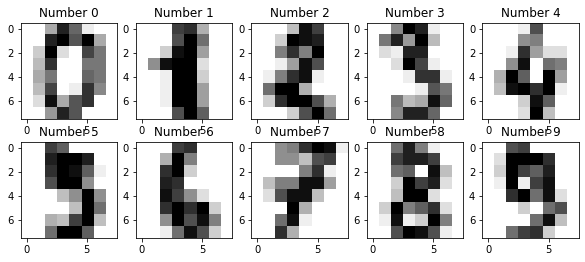

In [217]:
f, axs = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(digits.images[i], cmap=matplotlib.cm.binary)
    ax.set_title(f"Number {i}")
plt.savefig("NN03_digits.pdf", bbox_inches='tight')

## Neural Network via Perceptron

Perceptron is the simplest form of Neural Network.

In [218]:
from sklearn.linear_model import Perceptron

# Step 1: Create an instance
perceptron = Perceptron()

In [219]:
y = digits.target == 9 # filter only the desired target from the array

In [220]:
# Step 2: Fit the model
perceptron.fit(digits['data'], y)

Perceptron()

In [221]:
# Step 3: Verify the performance of the classification via confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y, perceptron.predict(digits['data']))

array([[1613,    4],
       [  16,  164]], dtype=int64)

In [222]:
# determining accuracy of predictions (ie. proportion of values correctly predicted)
accuracy_score(y, perceptron.predict(digits.data)) 

0.9888703394546466

In [223]:
perceptron.coef_ # coef is used to access the weights, w vector assigned to the features

array([[   0.,  -73.,  -60.,   59.,  -37., -166.,  -61.,  -74.,   -3.,
          27.,  101.,   27.,   -1.,   27.,   99.,  -78.,   -8.,   65.,
          91.,   43.,   23.,  284.,  -17.,  -88.,   -3.,  -98.,   75.,
         161.,  -51.,  178.,  -66.,   -8.,    0., -259., -107.,  209.,
        -199., -119.,   10.,    0.,    0.,  -31., -335., -551., -258.,
         -99.,  -98.,    4.,    0.,   63.,  -36.,  -14.,  -64., -104.,
         -29.,   22.,    0.,  -42.,  -90.,  -88.,    5.,  -23.,  -18.,
         -15.]])

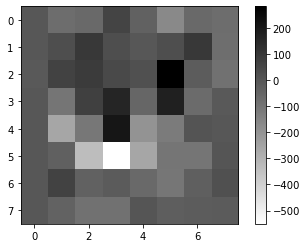

In [224]:
# plotting weights to see if there is any structure in the data
plt.imshow(perceptron.coef_.reshape(8, 8), cmap=matplotlib.cm.binary)
plt.colorbar()

## Linear Combiner

In [225]:
perceptron.intercept_ # bias, bk (intercept)

array([-38.])

In [226]:
# calculating vk + bk (linear combiner) - specifically v9 + b9 (linear combiner @ index-9)
np.dot(digits['data'][9, :], perceptron.coef_[0]) + perceptron.intercept_

array([2794.])

In [227]:
errors = y != perceptron.predict(digits['data']) # boolean array of true/false vals, compares predicted vs actual
errors

array([False, False, False, ..., False, False, False])

In [228]:
y[errors] # selects the incorrectly predicted vals

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True,  True,
        True,  True])

In [229]:
np.arange(y.shape[0])[errors] # index of incorrectly predicted values

array([  37,   69,  275,  325,  329,  361,  491,  555,  677,  751, 1018,
       1125, 1186, 1412, 1462, 1514, 1572, 1582, 1658, 1662])

Text(0.5, 1.0, 'label 9, prediction [False]')

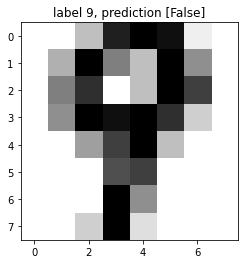

In [230]:
plt.imshow(digits.images[275], cmap=matplotlib.cm.binary)
y_hat = perceptron.predict(digits['data'][[275], :])
plt.title(f"label {digits.target[275]}, prediction {y_hat}")

In [231]:
perceptron.predict(digits.data[[0], :]) # model has learnt to discriminate the value of 9 from other values

array([False])

In [232]:
perceptron.predict(digits.data[[9], :])

array([ True])

## Probability Estimation

In [233]:
from sklearn.linear_model import LogisticRegression

In [242]:
z = np.dot(digits.data, perceptron.coef_[0]) + perceptron.intercept_

In [247]:
clf = LogisticRegression()
clf.fit(z[:, np.newaxis], y)

LogisticRegression()

In [250]:
# as long as its a continuous number w/ some range, you can use logistic regression to map it into probability
clf.predict_proba(z[:, np.newaxis])[:10, :]

array([[9.97320401e-01, 2.67959922e-03],
       [9.99999931e-01, 6.94965301e-08],
       [9.99999996e-01, 3.68640869e-09],
       [9.98912229e-01, 1.08777109e-03],
       [1.00000000e+00, 2.44313282e-12],
       [4.08378333e-01, 5.91621667e-01],
       [1.00000000e+00, 3.52899197e-11],
       [9.99997137e-01, 2.86251004e-06],
       [9.99981775e-01, 1.82253464e-05],
       [9.91147235e-03, 9.90088528e-01]])

## Multiclass problem

In [251]:
mcp = Perceptron()

In [252]:
mcp.fit(digits.data, digits.target)

Perceptron()

In [253]:
mcp.intercept_

array([ -5., -52.,  -7., -23.,   4., -12., -17.,  -4., -69., -35.])

In [262]:
mcp.coef_.shape # each model has 64 components, which is hard to understand and to see a pattern, so need to project onto 2D space

(10, 64)

In [257]:
y_hat = mcp.predict(digits.data)

In [259]:
np.unique(y_hat)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [260]:
accuracy_score(digits.target, y_hat)

0.9393433500278241

In [261]:
confusion_matrix(digits.target, y_hat) 

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 181,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   4, 172,   1,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2, 178,   0,   0,   0,   2,   0,   0],
       [  0,   4,   0,   0, 177,   0,   0,   0,   0,   0],
       [  0,   6,   2,   3,   0, 167,   0,   2,   0,   2],
       [  1,   5,   0,   0,   1,   0, 174,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 178,   0,   1],
       [  0,  38,   7,   3,   1,   0,   0,   1, 123,   1],
       [  0,  10,   1,   3,   0,   1,   0,   5,   0, 160]], dtype=int64)

## PCA Analysis of Model

each model has 64 components, which is hard to understand and to see a pattern, so need to project onto 2D space hence need to use PCA

In [268]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = make_pipeline(StandardScaler(), PCA(n_components=2))
pca.fit(mcp.coef_)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [269]:
PC = pca.transform(mcp.coef_)

In [271]:
pca.named_steps.keys()

dict_keys(['standardscaler', 'pca'])

In [272]:
explained_variance = pca.named_steps['pca'].explained_variance_

In [274]:
explained_variance / np.sum(explained_variance)

array([0.55640808, 0.44359192])

Text(0.5, 1.0, 'Representation of the coefficients for different models in PCA space ')

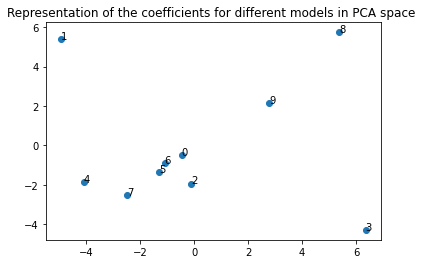

In [277]:
plt.plot(PC[:, 0], PC[:, 1], 'o') 
for x, y, s in zip(PC[:, 0], PC[:, 1], range(10)):
    plt.text(x, y, str(s))

plt.title("Representation of the coefficients for different models in PCA space ")

The model has learnt something sensible to discriminate most of these features of these digits.

We have 10 different models, each of these models has 64 coefficients. 
The Principal Components try to find the axis in the 64 dimensional space, which describes most of the variation.